In [2]:
### Let's read a sample audio using librosa
import librosa
audio_file_path = 'UrbanSound8K/dog_bark.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [3]:
print(librosa_audio_data)

[ 0.0000000e+00  2.0372681e-10  0.0000000e+00 ...  3.6435056e-04
  2.6052792e-04 -2.1291801e-04]


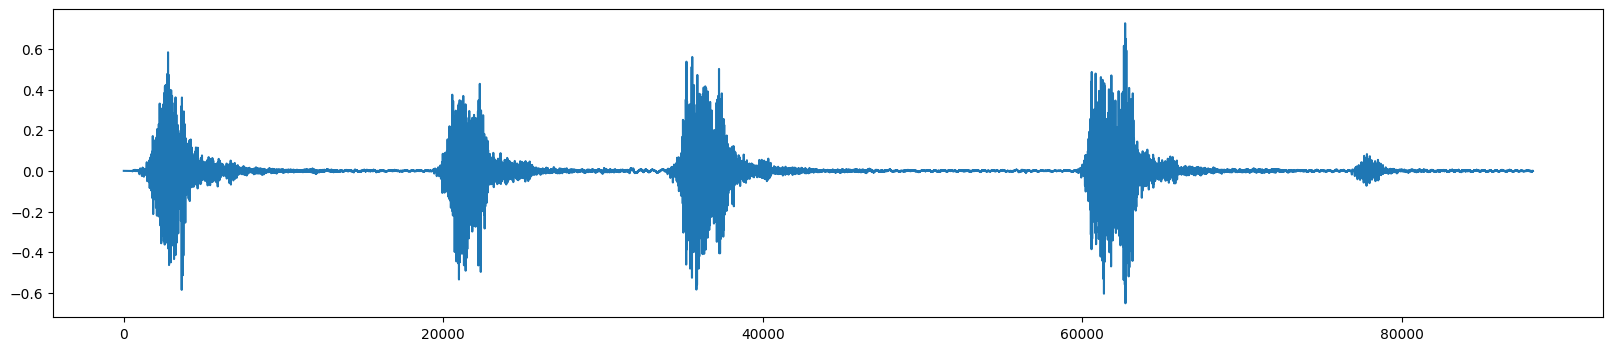

In [4]:
### Let's plot the sample audio data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
plt.plot(librosa_audio_data)

In [5]:
### Let's read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio_data  = wav.read(audio_file_path)

In [6]:
print(wave_audio_data)

[[  0   0]
 [  0   0]
 [  0   0]
 ...
 [  6  -5]
 [  7 -17]
 [ -5 -21]]


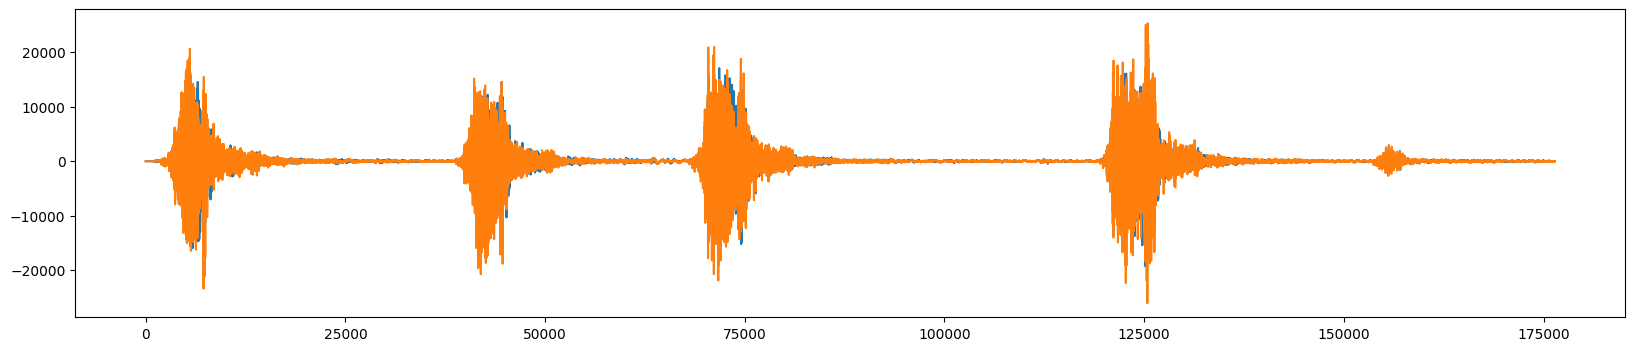

In [7]:
plt.figure(figsize=(20, 4))
plt.plot(wave_audio_data)

In [8]:
mfcc = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfcc.shape)

(40, 173)


In [9]:
mfcc

array([[-5.8003693e+02, -4.9177695e+02, -3.6617480e+02, ...,
        -5.0730090e+02, -5.1229175e+02, -5.2267578e+02],
       [ 3.0879444e+01,  1.1654911e+02,  1.7551927e+02, ...,
         9.0842972e+01,  9.2580032e+01,  8.8494919e+01],
       [ 1.7225262e+01,  3.9759506e+01, -5.0101800e+00, ...,
         2.7333736e+01,  2.7949631e+01,  3.1582386e+01],
       ...,
       [-3.7395434e+00, -4.9923811e+00,  4.4441919e+00, ...,
         2.7369020e+00,  1.6080581e+00,  2.7038860e+00],
       [-1.9384006e+00, -4.6505344e-01,  6.2187862e+00, ...,
         2.7966883e+00,  2.2691026e+00,  9.9648082e-01],
       [ 1.7400697e+00,  2.0404897e+00,  4.3179550e+00, ...,
         1.5787623e+00,  1.0261312e+00, -3.2630148e+00]], dtype=float32)

In [10]:
### Extracting MFCC's for every audio file

import pandas as pd
import os
import librosa
import numpy as np

audio_dataset_path = 'UrbanSound8K/audio'
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file)
    mfccs_feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_feature.T, axis=0)

    return mfccs_scaled_features

In [12]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
# Initialize list to hold extracted features and labels
extracted_features = []

# Iterate through each row in metadata
for index_num, row in tqdm(metadata.iterrows(), total=metadata.shape[0]):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row["fold"]), str(row["slice_file_name"]))
    final_class_labels = row["class"]
    try:
        data = feature_extractor(file_name)
        extracted_features.append([data, final_class_labels])
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

 41%|████      | 3553/8732 [01:46<01:58, 43.76it/s]/Users/varshit_madi/Library/Python/3.9/lib/python/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
 95%|█████████▌| 8322/8732 [03:41<00:15, 27.24it/s]/Users/varshit_madi/Library/Python/3.9/lib/python/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
 95%|█████████▌| 8327/8732 [03:41<00:13, 30.59it/s]/Users/varshit_madi/Library/Python/3.9/lib/python/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
100%|██████████| 8732/8732 [03:49<00:00, 38.06it/s]


In [13]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.581207, -122.81315, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578075, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.65879, 50.690277, ...",children_playing


In [14]:
### Split the dataset into independent and dependent dataset
x=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [15]:
x.shape

(8732, 40)

In [16]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [17]:
y.shape

(8732, 10)

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
print(tf.__version__)

2.15.0


In [20]:
### No of classes
num_labels=y.shape[1]

In [21]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [23]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [24]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
183/219 [========================>.....] - ETA: 0s - loss: 13.0832 - accuracy: 0.1223
Epoch 1: val_loss improved from inf to 2.29594, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 11.4963 - accuracy: 0.1228 - val_loss: 2.2959 - val_accuracy: 0.1076
Epoch 2/100
135/219 [=================>............] - ETA: 0s - loss: 2.6929 - accuracy: 0.1250

/Users/varshit_madi/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


180/219 [=======================>......] - ETA: 0s - loss: 2.6387 - accuracy: 0.1233
Epoch 2: val_loss improved from 2.29594 to 2.28418, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.5997 - accuracy: 0.1205 - val_loss: 2.2842 - val_accuracy: 0.1070
Epoch 3/100
217/219 [============================>.] - ETA: 0s - loss: 2.3561 - accuracy: 0.1168
Epoch 3: val_loss improved from 2.28418 to 2.27636, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.3557 - accuracy: 0.1164 - val_loss: 2.2764 - val_accuracy: 0.1070
Epoch 4/100
192/219 [=========================>....] - ETA: 0s - loss: 2.2943 - accuracy: 0.1193
Epoch 4: val_loss improved from 2.27636 to 2.27224, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 2.2912 - accuracy: 0.1194 - val_loss: 2.2722 - val_accuracy: 0.1076
Epoch 5

In [25]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7664567828178406


In [26]:
filename="UrbanSound8K/dog_bark.wav"
prediction_feature=feature_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict(prediction_feature)

1/1 [==============================] - 0s 95ms/step


array([[2.0169607e-06, 2.6008642e-05, 4.2027916e-04, 9.3461394e-01,
        1.6907483e-03, 3.0464291e-06, 5.5240717e-02, 2.1294086e-10,
        1.6697226e-03, 6.3334862e-03]], dtype=float32)

In [27]:
prediction_feature.shape

(1, 40)

In [28]:
X_test[1]

array([-4.6372937e+02, -2.4342041e+00, -3.0510254e+01,  3.1887177e+01,
       -1.1492151e+01, -2.2429037e+01,  2.6173561e+00, -1.9217157e+01,
       -1.8388453e+01,  4.8640223e+00, -2.6504791e+01, -2.1446793e+01,
       -6.2482238e-01, -1.0320668e+01, -1.3166057e+01, -8.4201450e+00,
       -5.9292469e+00,  7.8685222e+00,  1.5739538e+01,  2.0787935e+01,
        2.1855345e+01,  4.8449859e-01, -1.8518404e+01, -5.2144322e+00,
       -5.9252870e-01,  2.8596678e+00, -6.7274928e+00, -1.6577028e+01,
       -9.9458332e+00,  1.2997779e+01,  4.7754970e-01, -2.3734228e+01,
       -1.5428540e+01,  9.4471149e+00,  1.0129692e+01, -3.1265873e-01,
       -1.5573802e+00,  1.8017395e+01,  1.3511433e+01, -4.8382730e+00],
      dtype=float32)

In [29]:
model.predict(X_test)

55/55 [==============================] - 0s 634us/step


array([[5.70220182e-05, 7.26161379e-05, 6.34343422e-04, ...,
        5.63255053e-05, 1.13819398e-04, 1.32857170e-03],
       [1.29108999e-35, 1.21317314e-11, 1.49290822e-23, ...,
        1.47589848e-15, 1.06864226e-19, 4.89020390e-16],
       [1.21481465e-08, 1.02279184e-03, 1.06671303e-06, ...,
        3.66936787e-03, 8.90575757e-06, 1.08260289e-03],
       ...,
       [2.65746894e-05, 6.30552411e-01, 2.06975928e-05, ...,
        3.29014729e-05, 1.10493813e-04, 3.34785193e-01],
       [1.25997797e-01, 1.13879461e-02, 1.93838060e-01, ...,
        2.33928002e-02, 1.92829929e-02, 3.90451759e-01],
       [1.71629399e-01, 5.08514512e-03, 3.38009566e-01, ...,
        6.09706668e-03, 3.18280570e-02, 1.12193152e-01]], dtype=float32)

In [30]:
import librosa
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the pre-trained model
model = load_model('saved_models/audio_classification.hdf5')

# Function to extract features
def feature_extractor(filename):
    # Load the audio file
    audio, sample_rate = librosa.load(filename)
    
    # Extract MFCC features
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    
    # Compute the mean of the MFCCs
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

# Specify the filename
filename = "UrbanSound8K/144351-4-0-0.wav"

# Extract features
mfccs_scaled_features = feature_extractor(filename)

# Reshape the features to match the input shape expected by the model
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Print the features and their shape
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Predict the class probabilities
prediction = model.predict(mfccs_scaled_features)

# Get the class with the highest probability
predicted_label = np.argmax(prediction, axis=1)

# Assuming you have a LabelEncoder fitted with your class labels
labelencoder = LabelEncoder()
# Replace 'class_names' with your actual class names used for training
class_names = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 
               'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']
labelencoder.fit(class_names)

print(labelencoder.inverse_transform(predicted_label))
# Get the predicted class name
prediction_class = labelencoder.inverse_transform(predicted_label)
print(f"The predicted class is: {prediction_class[0]}")


[[-3.9340866e+01  8.7915430e+00 -5.3928898e+01 -1.7705738e+01
  -2.8243052e+01  5.6508036e+00 -1.8354154e+00  4.9586654e+00
  -1.0350377e+01 -1.2590275e+00 -5.0052505e+00 -9.0419006e+00
  -8.3224487e+00  5.4142708e-01 -2.9628017e+00  3.3221083e+00
   2.3827498e+00  5.2281690e+00  5.0562654e-02  2.4996824e+00
  -2.7616210e+00  5.0752354e+00 -7.4062407e-01  3.7818301e+00
   3.1943183e+00  8.0430717e+00 -8.3825666e-01  3.3868690e+00
  -7.5443751e-01  2.3012588e+00 -1.7882472e+00  4.1077085e+00
  -2.5410430e+00 -1.2147988e+00 -2.0830746e+00  3.3530161e+00
  -1.4399236e+00  5.7094750e+00  1.3025745e+00  2.1088226e+00]]
(1, 40)
1/1 [==============================] - 0s 87ms/step
['drilling']
The predicted class is: drilling
